In [18]:
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime,date
import datetime as dt
from collections import Counter
from matplotlib.ticker import FuncFormatter

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [19]:
filename = Path('RF_subgrade_prob.csv')
df_report = pd.read_csv(filename, skiprows=0)
df_report.set_index('sub_grade',inplace=True)
df_report

,model,n_loans,AUC_test,prec_5,prec_10,prec_20,random,ratio_5,ratio_10,ratio_20
sub_grade,,,,,,,,,,
A1,random forest,"9,162",0.5669,0.9774,0.9777,0.9786,0.9681,1.0096,1.0099,1.0108
A2,random forest,"6,824",0.5319,0.9589,0.9585,0.9557,0.9499,1.0094,1.0091,1.0061
A3,random forest,"6,570",0.5642,0.9657,0.9620,0.9578,0.9495,1.0171,1.0132,1.0088
A4,random forest,"9,587",0.5390,0.9568,0.9471,0.9463,0.9346,1.0238,1.0133,1.0125
A5,random forest,"12,338",0.5255,0.9308,0.9352,0.9309,0.9194,1.0124,1.0171,1.0125
B1,random forest,"13,509",0.5500,0.9363,0.9220,0.9246,0.9027,1.0372,1.0214,1.0243
B2,random forest,"13,804",0.5393,0.8982,0.8953,0.9009,0.8912,1.0078,1.0046,1.0109
B3,random forest,"15,232",0.5402,0.8903,0.8937,0.8968,0.8764,1.0158,1.0197,1.0232
B4,random forest,"16,211",0.5447,0.8664,0.8782,0.8832,0.8600,1.0075,1.0212,1.0270


In [20]:
file_path = Path('subgrade_dataframe_w_return.csv')
return_sub_grade = pd.read_csv(file_path,skiprows=0)
return_sub_grade.set_index('sub_grade',inplace=True)
return_sub_grade

,good_pct,default_pct,loan_amount,fico_low,annual_income,interest_rate,DTI,description,credit_history,return_low_range,return_high_range,default_ret_low,good_ret_low,default_ret_high,good_ret_high
sub_grade,,,,,,,,,,,,,,,
A1,0.969821,0.030179,14536.705070,743.760892,101732.769478,0.054695,0.054695,0.005615,14.599026,0.019801,0.031039,-0.114755,0.023988,-0.114139,0.035557
A2,0.950741,0.049259,13955.717726,728.842589,91831.553566,0.064963,0.064963,0.011019,15.712078,0.021669,0.035367,-0.108059,0.028390,-0.107583,0.042773
A3,0.944144,0.055856,14144.122777,720.237827,90577.849226,0.070609,0.070609,0.017481,16.466491,0.023058,0.037923,-0.110451,0.030957,-0.110146,0.046682
A4,0.922822,0.077178,14687.432412,714.232044,89734.345031,0.074434,0.074434,0.018517,16.372034,0.022622,0.038289,-0.096301,0.032568,-0.095981,0.049519
A5,0.898780,0.101220,14830.036668,709.745310,87087.897955,0.080981,0.080981,0.017668,16.751255,0.023322,0.040659,-0.083352,0.035335,-0.081817,0.054452
B1,0.872138,0.127862,13800.348739,700.676861,83799.928191,0.085580,0.085580,0.015599,17.077338,0.022145,0.040700,-0.079595,0.037061,-0.079035,0.058254
B2,0.864931,0.135069,13669.353174,696.809171,80870.419605,0.095458,0.095458,0.016569,17.431263,0.024304,0.045376,-0.083665,0.041165,-0.082999,0.065423
B3,0.843460,0.156540,14363.195179,696.274553,80228.065848,0.103615,0.103615,0.017686,17.785492,0.025386,0.048514,-0.077903,0.044556,-0.077070,0.071821
B4,0.823838,0.176162,13981.372593,693.991068,77179.451343,0.111687,0.111687,0.015431,17.983740,0.025776,0.050904,-0.076724,0.047694,-0.075872,0.078013


In [21]:
return_data = pd.merge(return_sub_grade,df_report,how='inner',on='sub_grade')

In [22]:
return_data['ret_10_low']=return_data['prec_10']*return_data['good_ret_low'] + (1-return_data['prec_10'])*return_data['default_ret_low']
return_data['ret_10_high']=return_data['prec_10']*return_data['good_ret_high'] + (1-return_data['prec_10'])*return_data['default_ret_high']
return_data.sample(3).T



sub_grade,C1,B1,A3
good_pct,0.786709,0.872138,0.944144
default_pct,0.213291,0.127862,0.0558557
loan_amount,13873.3,13800.3,14144.1
fico_low,688.787,700.677,720.238
annual_income,74761.2,83799.9,90577.8
interest_rate,0.124837,0.0855804,0.0706087
DTI,0.124837,0.0855804,0.0706087
description,0.0124143,0.015599,0.0174807
credit_history,18.7086,17.0773,16.4665
return_low_range,0.0241673,0.0221447,0.0230581


<function matplotlib.pyplot.show(*args, **kw)>

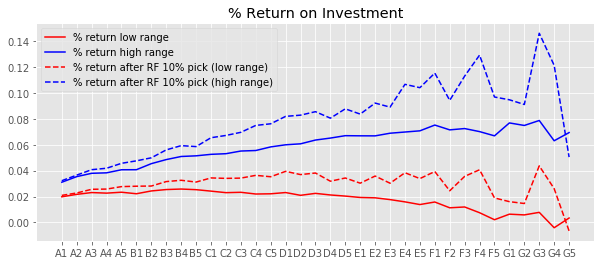

In [23]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(return_data['return_low_range'], color='r', label='% return low range')
ax.plot(return_data['return_high_range'], color='b', label='% return high range')
ax.plot(return_data['ret_10_low'], color='r', label='% return after RF 10% pick (low range)',linestyle="--")
ax.plot(return_data['ret_10_high'], color='b', label='% return after RF 10% pick (high range)',linestyle="--")
ax.set_title('% Return on Investment')
ax.legend(loc='upper left')
plt.show